## 6.10　結果確認


In [1]:
# !pip install japanize_matplotlib | tail -n 1
# !pip install torchviz | tail -n 1
# !pip install torchinfo | tail -n 1

In [2]:
import torch
import numpy as np
import pandas as pd
import torch.nn as nn
import japanize_matplotlib
import torch.optim as optim
import matplotlib.pyplot as plt
from torchviz import make_dot
from torchinfo import summary
from IPython.display import display
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [3]:
%matplotlib inline

In [4]:
iris = load_iris()
x_org, y_org = iris.data, iris.target
print('元データ', x_org.shape, y_org.shape)

元データ (150, 4) (150,)


In [5]:
x_data = iris.data[:100, :2]
y_data = iris.target[:100]
print('対象データ', x_data.shape, y_data.shape)

対象データ (100, 2) (100,)


In [6]:
print(x_data.shape, y_data.shape)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=70, test_size=30, random_state=123)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(100, 2) (100,)
(70, 2) (30, 2) (70,) (30,)


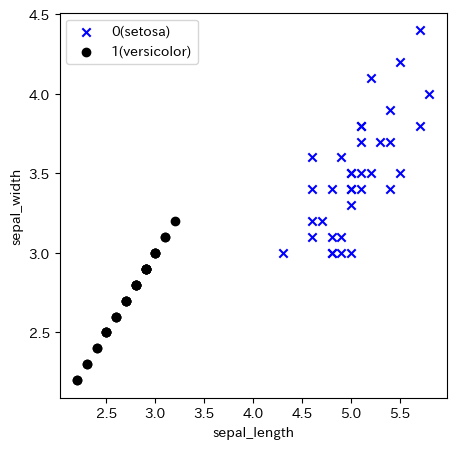

In [7]:
x_t0 = x_train[y_train == 0]
x_t1 = x_train[y_train == 1]
plt.figure(figsize=(5, 5))
plt.scatter(x_t0[:, 0], x_t0[:, 1], marker='x', c='b', label='0(setosa)')
plt.scatter(x_t1[:, 1], x_t1[:, 1], marker='o', c='k', label='1(versicolor)')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend()
plt.show()

In [8]:
n_input = x_train.shape[1]
n_output = 1
print(f'n_input: {n_input}  n_output: {n_output}')

n_input: 2  n_output: 1


In [9]:
class Net(nn.Module):
  def __init__(self, n_input, n_output):
    super().__init__()
    self.l1 = nn.Linear(n_input, n_output)
    self.sigmoid = nn.Sigmoid()

    self.l1.weight.data.fill_(1.0)
    self.l1.bias.data.fill_(1.0)

  def forward(self, x):
    x1 = self.l1(x)
    x2 = self.sigmoid(x1)
    return x2

In [10]:
net = Net(n_input, n_output)

In [11]:
for parameter in net.named_parameters():
  print(parameter)

('l1.weight', Parameter containing:
tensor([[1., 1.]], requires_grad=True))
('l1.bias', Parameter containing:
tensor([1.], requires_grad=True))


In [12]:
print(net)

Net(
  (l1): Linear(in_features=2, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [13]:
summary(net, (2,))

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [1]                       --
├─Linear: 1-1                            [1]                       3
├─Sigmoid: 1-2                           [1]                       --
Total params: 3
Trainable params: 3
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [14]:
criterion = nn.BCELoss()
lr = 0.01
optimizer = optim.SGD(net.parameters(), lr=lr)

In [15]:
inputs = torch.tensor(x_train).float()
labels = torch.tensor(y_train).float()

labels1 = labels.view((-1, 1))

inputs_test = torch.tensor(x_test).float()
labels_test = torch.tensor(y_test).float()

labels1_test = labels_test.view((-1, 1))

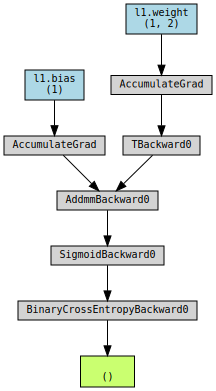

In [16]:
outputs = net(inputs)
loss = criterion(outputs, labels1)

g = make_dot(loss, params=dict(net.named_parameters()))
display(g)

In [17]:
lr = 0.01
net = Net(n_input, n_output)
criterion = nn.BCELoss()
optimizer = optim.SGD(net.parameters(), lr=lr)
num_epochs = 10000
history = np.zeros((0, 5))

In [18]:
for epoch in range(num_epochs):
  optimizer.zero_grad()
  outputs = net(inputs)
  loss = criterion(outputs, labels1)
  loss.backward()
  optimizer.step()

  train_loss = loss.item()
  predicted = torch.where(outputs < 0.5, 0, 1)
  train_acc = (predicted == labels1).sum() / len(y_train)

  outputs_test = net(inputs_test)
  loss_test = criterion(outputs_test, labels1_test)
  val_loss = loss_test.item()
  predicted_test = torch.where(outputs_test < 0.5, 0, 1)
  val_acc = (predicted_test == labels1_test).sum() / len(y_test)

  if (epoch % 10 == 0):
    print(f'Epoch [{epoch}/{num_epochs}], loss: {train_loss:.5f} acc: {train_acc:.5f} val_loss: {val_loss:.5f}, val_acc: {val_acc:.5f}')
    item = np.array([epoch, train_loss, train_acc, val_loss, val_acc])
    history = np.vstack((history, item))

Epoch [0/10000], loss: 4.77289 acc: 0.50000 val_loss: 4.49384, val_acc: 0.50000
Epoch [10/10000], loss: 3.80546 acc: 0.50000 val_loss: 3.56537, val_acc: 0.50000
Epoch [20/10000], loss: 2.84329 acc: 0.50000 val_loss: 2.64328, val_acc: 0.50000
Epoch [30/10000], loss: 1.91613 acc: 0.50000 val_loss: 1.76244, val_acc: 0.50000
Epoch [40/10000], loss: 1.17137 acc: 0.50000 val_loss: 1.08537, val_acc: 0.50000
Epoch [50/10000], loss: 0.84140 acc: 0.50000 val_loss: 0.81872, val_acc: 0.50000
Epoch [60/10000], loss: 0.77087 acc: 0.50000 val_loss: 0.77093, val_acc: 0.50000
Epoch [70/10000], loss: 0.75450 acc: 0.34286 val_loss: 0.76105, val_acc: 0.33333
Epoch [80/10000], loss: 0.74542 acc: 0.25714 val_loss: 0.75447, val_acc: 0.20000
Epoch [90/10000], loss: 0.73734 acc: 0.24286 val_loss: 0.74778, val_acc: 0.16667
Epoch [100/10000], loss: 0.72949 acc: 0.24286 val_loss: 0.74098, val_acc: 0.13333
Epoch [110/10000], loss: 0.72180 acc: 0.27143 val_loss: 0.73419, val_acc: 0.16667
Epoch [120/10000], loss: 0.

In [19]:
print(f'初期状態: 損失: {history[0, 3]:.5f} 精度: {history[0, 4]:.5f}')
print(f'最終状態: 損失: {history[-1, 3]:.5f} 精度: {history[-1, 4]:.5f}')

初期状態: 損失: 4.49384 精度: 0.50000
最終状態: 損失: 0.15395 精度: 0.96667


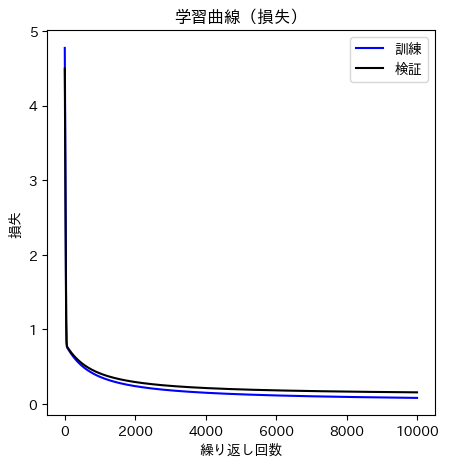

In [20]:
plt.figure(figsize=(5, 5))
plt.plot(history[:, 0], history[:, 1], 'b', label='訓練')
plt.plot(history[:, 0], history[:, 3], 'k', label='検証')
plt.xlabel('繰り返し回数')
plt.ylabel('損失')
plt.title('学習曲線（損失）')
plt.legend()
plt.show()

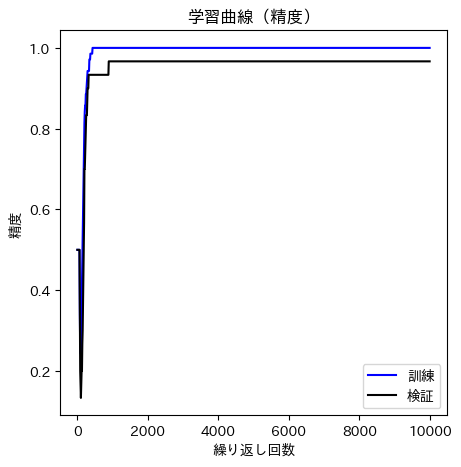

In [21]:
plt.figure(figsize=(5, 5))
plt.plot(history[:, 0], history[:, 2], 'b', label='訓練')
plt.plot(history[:, 0], history[:, 4], 'k', label='検証')
plt.xlabel('繰り返し回数')
plt.ylabel('精度')
plt.title('学習曲線（精度）')
plt.legend()
plt.show()

In [22]:
x_t0 = x_test[y_test==0]
x_t1 = x_test[y_test==1]

In [23]:
bias = net.l1.bias.data.numpy()
weight = net.l1.weight.data.numpy()
print(f'BIAS = {bias}, WEIGHT = {weight}')

def decision(x):
  return(-(bias + weight[0, 0] * x) / weight[0, 1])

x1 = np.array([x_test[:, 0].min(), x_test[:, 0].max()])
y1 = decision(x1)

print(f'x1 = {x1} y1 = {y1}')

BIAS = [0.33861196], WEIGHT = [[ 2.9700313 -5.300013 ]]
x1 = [4.4 7. ] y1 = [2.52956914 3.98656202]


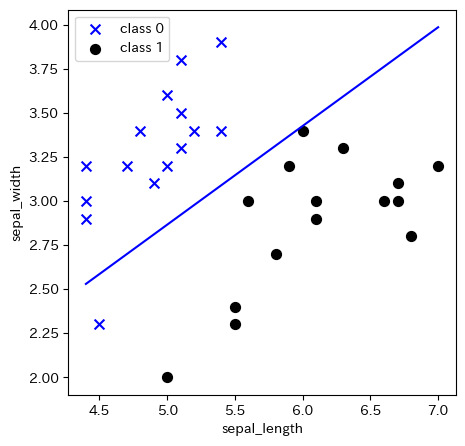

In [24]:
plt.figure(figsize=(5, 5))
plt.scatter(x_t0[:, 0], x_t0[:, 1], marker='x', c='b', s=50, label='class 0')
plt.scatter(x_t1[:, 0], x_t1[:, 1], marker='o', c='k', s=50, label='class 1')
plt.plot(x1, y1, c='b')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend()
plt.show()